In [1]:
#imports
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from config import api_key, api_secret, access_token, access_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, parser=tweepy.parsers.JSONParser())

In [2]:
#List of news agencies we will be doing the analysis on
target_users = ('@BBCWorld','@CBSNews','@CNN','@FoxNews','@nytimes')

#create a black list to hold the results
sentiments = []


#iterate through each of the search terms
for target in target_users:
    
    #Create counter
    counter = 1
    tweet_count = 0
    #loop through multiple pages of tweets
    for x in range(8):
        public_tweets = api.user_timeline(target, page = x)
        for tweet in public_tweets:
            #continue looking at tweets only if the tweet count is less than 100
            if tweet_count < 100:
                #only analyze original tweets from the news agencies, not retweets
                if not tweet['retweeted'] and 'RT @' not in tweet['text']:
                    tweet_text = tweet['text']
                        
                    results = analyzer.polarity_scores(tweet_text)
                    compound = results['compound']
                    positive = results['pos']
                    neutral = results['neu']
                    negative = results['neg']
                    tweets_ago = counter
                
                    tweets_ago = tweet['id']-1
                    sentiments.append({"User": target, "compound": compound, "Positive": positive, "Negative": negative, "Neutral": neutral, "Tweets Ago": counter})
                
                    counter += 1
                    tweet_count += 1
                    print(tweet_text)
                    print('---------------------')

Trump Tower fires: Blaze breaks out at New York property https://t.co/Wrev20IsB8
---------------------
Brazil's Lula surrenders to police https://t.co/6T9D4d5cGk
---------------------
Canada hockey team crash: 'Entire country in shock' at tragedy https://t.co/ely2UEKUu4
---------------------
Vatican police arrest ex-diplomat over 'child pornography' https://t.co/HHXmGkTDAz
---------------------
Israel to investigate killing of Palestinian journalist https://t.co/8kudrlTVuS
---------------------
Lula to surrender to police https://t.co/ksRE4gjgAA
---------------------
Prince of Wales gets new chief title in ceremony on South Pacific island of Vanuatu https://t.co/z1jSGRh4Hm
---------------------
Van drives into pedestrians in Germany https://t.co/0xtrQps5IL
---------------------
The migrant caravan from Central America travelling north https://t.co/gOwYZhuDUy
---------------------
Facebook suspends AIQ data firm used by Vote Leave in Brexit campaign https://t.co/FchzO29YDp
-------------

Trump threatens further $100bn in tariffs against China https://t.co/A8PdsH841c
---------------------
Australia 'shocked' by sheep deaths on ship https://t.co/IcfM5PvXek
---------------------
Saudi 'Prince Charming' Mohammed bin Salman comes to Hollywood https://t.co/15sxktzJPF
---------------------
Will Netflix's Amo be the Philippine Narcos? https://t.co/DeOl2sN8Zd
---------------------
Do Syrian refugees ever want to return home? https://t.co/PRzRkoDDoT
---------------------
Africa's week in pictures: 30 March-5 April https://t.co/HoB5TnyqND
---------------------
Gay Chechens flee threats, beatings and exorcism https://t.co/7yWm97sT3u
---------------------
Brazil judge tells Lula to turn himself in on Friday https://t.co/JjC6NVRwv6
---------------------
Stormy Daniels: Trump says he did not know about $130,000 payment https://t.co/vbeZGax1RI
---------------------
Spy poisoning: Russia says UK is 'playing with fire' https://t.co/gIL9Iftyx3
---------------------
Pressure builds on Tru

At least 4 people, including the driver, are dead after a driver plowed into a crowd of people near a pub in Muenst… https://t.co/5XvhBtCC7n
---------------------
"So far we do not know if the shooter shouted anything. No witnesses have said something like that. What we know is… https://t.co/za7H2qWGUQ
---------------------
"We do not know if this was a terror attack," Berlin journalist Anna Noryskiewicz says of incident in Muenster, Ger… https://t.co/FMO1WQBzvV
---------------------
UPDATE: Around 30 people are injured and 6 are in a critical condition after a vehicle crashed into a crowd in Germ… https://t.co/klVahTCCgA
---------------------
"I'm not going to be a Gabby Giffords": Republican U.S. Rep. Ralph Norman pulls out gun at constituent meeting… https://t.co/HWmKvfno9I
---------------------
MORE: Several dead, others injured after car crashes into crowd in Germany, police say https://t.co/wE3EboRJqU https://t.co/ygaBMcg4BN
---------------------
A tight-knit Canadian community i

The body of a female was found in the immediate vicinity of a crash in California that killed at least 5 members of… https://t.co/HGuaeTUhWA
---------------------
“We talked about death all the time … he’d say, 'death is the ultimate democracy. Everybody has got to die'”: Civil… https://t.co/x6RwelBh72
---------------------
Several Syrian activist groups say a toxic gas attack killed dozens of people in Ghouta. The Syrian regime says it'… https://t.co/rsqaEjmnGL
---------------------
'Black Panther' was “always” going to tackle “political issues head on,” says the film’s director, Ryan Coogler… https://t.co/ey8JNVnON7
---------------------
"Our democracy was hacked before Vladimir Putin ... it was hacked by big money," former Vice President Al Gore tell… https://t.co/ikSaN8SnQe
---------------------
Al Gore tells @VanJones68 that President Trump "ought to fire" Environmental Protection Agency administrator Scott… https://t.co/0cAw6kPtD6
---------------------
Roger Stone, a longtime ass

As Michigan ends a free bottled water program in Flint claiming the water quality has been restored, some residents… https://t.co/9a8502Jt5J
---------------------
In 2014, a 23-year-old woman with cerebral palsy was allegedly gang-raped and thrown from a rooftop. 

A Human Righ… https://t.co/y5yygCRmfE
---------------------
Female medics were asked to stop treating a collapsed official because women aren’t allowed in sumo rings… https://t.co/8E6Nr8OjBW
---------------------
Why trainloads of other people's poo ended up rotting in an Alabama town for months https://t.co/jWgrCrVksn https://t.co/BzCyIU8urg
---------------------
A crash between a tractor-trailer and a bus carrying a junior league hockey team left 14 people dead  in western Ca… https://t.co/X9nY10HlAw
---------------------
Sinclair's fake-news zombies should terrify you | By David Rothkopf via @CNNOpinion https://t.co/6fwDXWhmc2 https://t.co/sYYHRsfZv8
---------------------
Artificial intelligence scientists from around the

Victims slowly identified in Canadian hockey team bus crash disaster; death toll rises to 15 https://t.co/dDnMLSCjDD
---------------------
Fire erupts at Trump Tower in New York City https://t.co/V0SMyno1bu
---------------------
.@susanferrechio: "If Pruitt goes, whoever comes in is not going to be as aggressive rolling back the EPA regulatio… https://t.co/8MQlf1ZLAz
---------------------
.@realDonaldTrump slams DOJ, FBI over missed document deadline: 'What is going on?' https://t.co/iAvfAkQhNc
---------------------
.@RepKevinCramer expected to win GOP endorsement to seek North Dakota Senate seat https://t.co/N8AQVi5cU2
---------------------
.@POTUS zeroes in on tackling illegal immigration after spending bill criticism https://t.co/XutrkLzr0N
---------------------
Volcanic lightning is seen above Shinmoedake peak as the peak erupts between Miyazaki and Kagoshima prefectures, so… https://t.co/Qx6IAKOyap
---------------------
Earlier, @PressSec reiterated the Trump administration's dedi

Emma González. 
Rose McGowan. 
The Dora Milaje soldiers in Black Panther. 
Natalie Portman in “V for Vendetta." 
Ch… https://t.co/rbGmXRrjcZ
---------------------
NEWS ANALYSIS: Though Deadly, Gaza Protests Draw Attention and Enthusiasm https://t.co/HXLmKi9lFp
---------------------
Last fall, we shared readers' 13-word stories of romance, obsession and heartbreak. Here are some more of the thous… https://t.co/g3eMYasllp
---------------------
Once you immerse yourself in the tasty, convenient world of sheet-pan suppers, you won’t want to stop https://t.co/uVuyCowd0C
---------------------
The snow monkeys of Japan like a nice warm bath. Scientists wanted to find out the real reason they sought out the… https://t.co/m0DcYjlvbW
---------------------
Children’s Books: If Graphic Novels Are Hip for Adults, Why Not Picture Books? https://t.co/CFsPm9Mj1w
---------------------
Fire Breaks Out at Trump Tower in Manhattan, Police Say https://t.co/7QTTQLIGy8
---------------------
Opinion: Mark Zuc

H.R. McMaster played down personal animosities with Trump but left little doubt that he and the president had diffe… https://t.co/zEWj6hWeuH
---------------------
Men were more than 3 times as likely as women to say they were smarter than the classmate with whom they worked mos… https://t.co/yPjPQMwDlZ
---------------------
Uncertainty remains in Washington, where lawmakers, lobbyists and even White House officials struggled to discern h… https://t.co/hbiNGUBy1f
---------------------
John Bolton and Mike Pompeo both have ties to individuals and groups promoting a worldview that regards Islam not s… https://t.co/574L8TMBiT
---------------------
Your weekend playlist has arrived https://t.co/2CMCSgMy6j
---------------------
Broccoli salads are a dime a dozen, but this one is a game-changing celebration of flavors, colors and textures https://t.co/jLcOBTpnyF
---------------------
Tiger Woods barely qualified to play the rest of The Masters and Phil Mickelson made the cut by only a stroke 

In [3]:
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df

,Negative,Neutral,Positive,Tweets Ago,User,compound
0,0.000,1.000,0.000,1,@BBCWorld,0.0000
1,0.000,1.000,0.000,2,@BBCWorld,0.0000
2,0.548,0.452,0.000,3,@BBCWorld,-0.8658
3,0.255,0.745,0.000,4,@BBCWorld,-0.3400
4,0.386,0.614,0.000,5,@BBCWorld,-0.6597
5,0.000,1.000,0.000,6,@BBCWorld,0.0000
6,0.000,1.000,0.000,7,@BBCWorld,0.0000
7,0.000,1.000,0.000,8,@BBCWorld,0.0000
8,0.000,1.000,0.000,9,@BBCWorld,0.0000
9,0.091,0.909,0.000,10,@BBCWorld,-0.0516


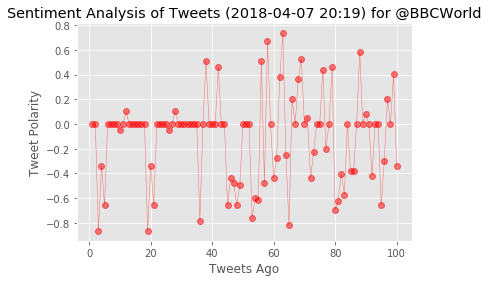

In [4]:
#Analyze BBCWorld
x_vals = sentiments_df[sentiments_df['User'] == '@BBCWorld']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@BBCWorld']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.5, color = 'red')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @BBCWorld")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

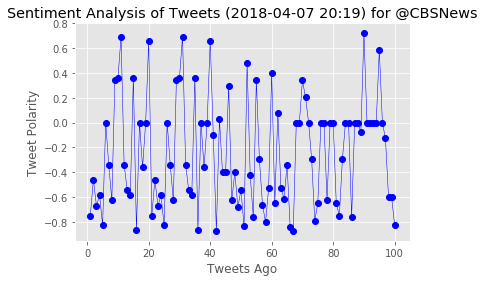

In [5]:
#Analyze @CBSNews
x_vals = sentiments_df[sentiments_df['User'] == '@CBSNews']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@CBSNews']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 1, color = 'blue')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @CBSNews")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

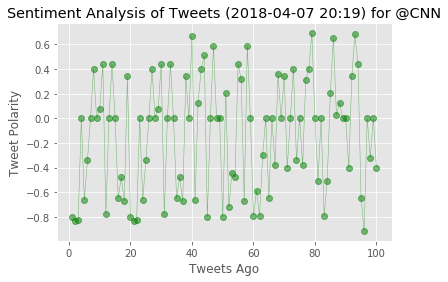

In [6]:
#Analyze BBCWorld
x_vals = sentiments_df[sentiments_df['User'] == '@CNN']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@CNN']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.5, color = 'green')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @CNN")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

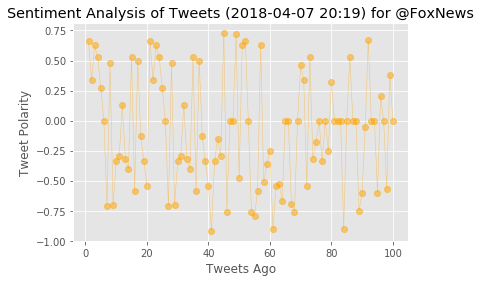

In [7]:
#Analyze BBCWorld
x_vals = sentiments_df[sentiments_df['User'] == '@FoxNews']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@FoxNews']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.5, color = 'orange')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @FoxNews")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

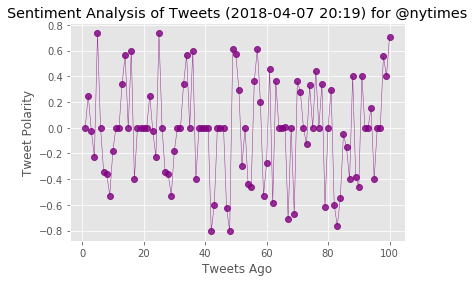

In [8]:
#Analyze NyTimes
x_vals = sentiments_df[sentiments_df['User'] == '@nytimes']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@nytimes']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.8, color = 'purple')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @nytimes")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

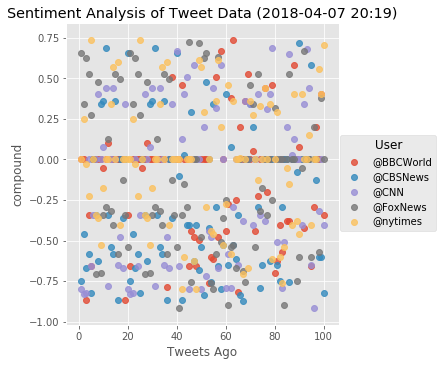

In [9]:
sns.lmplot(x = 'Tweets Ago', y='compound', data = sentiments_df, fit_reg=False, hue = 'User')
plt.title(f'Sentiment Analysis of Tweet Data ({now})')
plt.show()

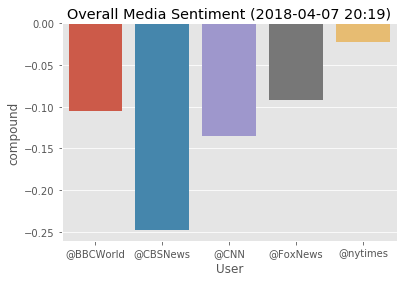

In [27]:
avg_sentiment = sentiments_df.groupby(['User']).mean()
avg_sentiment = avg_sentiment.reset_index()

sns.barplot(x='User', y = 'compound', data = avg_sentiment)
plt.title(f'Overall Media Sentiment ({now})')
plt.show()